In [1]:
import numpy as np

feature_columns = ["年龄", "是否有工作", "是否有自己的房子", "信贷状况"]
data = np.array(
    [
        ["青年", "否", "否", "一般", "否"],
        ["青年", "否", "否", "好", "否"],
        ["青年", "是", "否", "好", "是"],
        ["青年", "是", "是", "一般", "是"],
        ["青年", "否", "否", "一般", "否"],
        ["中年", "否", "否", "一般", "否"],
        ["中年", "否", "否", "好", "否"],
        ["中年", "是", "是", "好", "是"],
        ["中年", "否", "是", "非常好", "是"],
        ["中年", "否", "是", "非常好", "是"],
        ["老年", "否", "是", "非常好", "是"],
        ["老年", "否", "是", "好", "是"],
        ["老年", "是", "否", "好", "是"],
        ["老年", "是", "否", "非常好", "是"],
        ["老年", "否", "否", "一般", "否"],
    ]
)

In [2]:
def calc_probs(data):
    probs = [sum(data == i) / len(data) for i in np.unique(data)]
    return probs


def calc_entropy(data):
    _ps = calc_probs(data)
    entropy = sum([-pi * np.log2(pi) for pi in _ps])
    return entropy


def find_best_gain_ratio(X_train, y_train, features):
    h_d = calc_entropy(y_train)
    gr_max = 0
    feature_gr_max = 0
    for i in features:
        x_feature = X_train[:, i]
        ps = calc_probs(x_feature)
        Hs = [calc_entropy(y_train[x_feature == j]) for j in np.unique(x_feature)]
        h_da = sum(np.array(ps) * np.array(Hs))
        g = h_d - h_da
        h_ad = calc_entropy(x_feature)
        gr = g / h_ad
        if gr > gr_max:
            gr_max = gr
            feature_gr_max = i
    return gr_max, feature_gr_max


def C45_tree_generate(data, features, e=0.001):
    X_train = data[:, :-1]
    y_train = data[:, -1]

    # Step 1
    if len(np.unique(y_train)) <= 1:
        return np.unique(y_train)[0]

    # Step 2
    if len(features) < 1:
        return np.bincount(y_train).argmax()[0]

    # Step 3
    g_max, feature_g_max = find_best_gain_ratio(X_train, y_train, features)

    # Step 4
    if g_max < e:
        tree = {feature_columns[feature_g_max]: np.bincount(y_train).argmax()}
        return tree

    # Step 5, 6
    splited_datas = np.unique(data[:, feature_g_max])
    tree = {feature_columns[feature_g_max]: {}}
    for i in splited_datas:
        sub_data = data[data[:, feature_g_max] == i, :]
        sub_features = features.copy()
        sub_features.remove(feature_g_max)
        tree[feature_columns[feature_g_max]][i] = C45_tree_generate(
            sub_data, sub_features
        )
    return tree

In [3]:
features = [0, 1, 2, 3]
C45_tree_generate(data, features)

{'是否有自己的房子': {'否': {'是否有工作': {'否': '否', '是': '是'}}, '是': '是'}}

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = np.array(
    [
        [1, 0, 0, 1, 0],
        [1, 0, 0, 2, 0],
        [1, 1, 0, 2, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 1, 0],
        [2, 0, 0, 1, 0],
        [2, 0, 0, 2, 0],
        [2, 1, 1, 2, 1],
        [2, 0, 1, 3, 1],
        [2, 0, 1, 3, 1],
        [3, 0, 1, 3, 1],
        [3, 0, 1, 2, 1],
        [3, 1, 0, 2, 1],
        [3, 1, 0, 3, 1],
        [3, 0, 0, 1, 0],
    ]
)

X_train = data[:, :-1]
y_train = data[:, -1]
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)

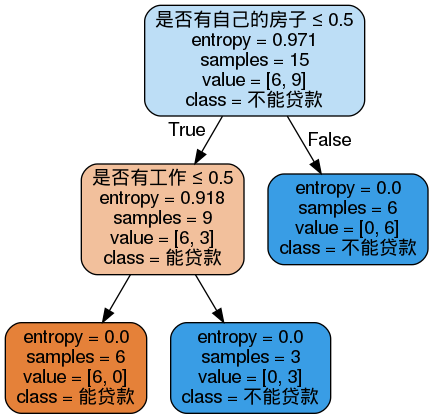

In [5]:
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(
    clf,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=feature_columns,
    class_names=["能贷款", "不能贷款"],
    special_characters=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())